In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc("font", family=font_name)

import matplotlib as mlp
mlp.rcParams["axes.unicode_minus"] = False

import seaborn as sns

plt.style.use("fivethirtyeight")

import warnings
warnings.filterwarnings("ignore")

# 서울시 공공 자전거 대여 분석

#### 1) 데이터 준비

In [2]:
bike = pd.read_csv("data/SeoulBikeData.csv")
bike.head(10)

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes
5,01/12/2017,100,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,Winter,No Holiday,Yes
6,01/12/2017,181,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,Winter,No Holiday,Yes
7,01/12/2017,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,Winter,No Holiday,Yes
8,01/12/2017,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,Winter,No Holiday,Yes
9,01/12/2017,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,Winter,No Holiday,Yes


In [3]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      8760 non-null   object 
 1   Rented Bike Count         8760 non-null   int64  
 2   Hour                      8760 non-null   int64  
 3   Temperature(C)            8760 non-null   float64
 4   Humidity(%)               8760 non-null   int64  
 5   Wind speed (m/s)          8760 non-null   float64
 6   Visibility (10m)          8760 non-null   int64  
 7   Dew point temperature(C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)   8760 non-null   float64
 9   Rainfall(mm)              8760 non-null   float64
 10  Snowfall (cm)             8760 non-null   float64
 11  Seasons                   8760 non-null   object 
 12  Holiday                   8760 non-null   object 
 13  Functioning Day           8760 non-null   object 
dtypes: float

#### 2) 시간대별로 평균 몇 대가 대여 되었을까?

In [4]:
bike.groupby("Hour")["Rented Bike Count"].mean()

Hour
0      541.460274
1      426.183562
2      301.630137
3      203.331507
4      132.591781
5      139.082192
6      287.564384
7      606.005479
8     1015.701370
9      645.983562
10     527.821918
11     600.852055
12     699.441096
13     733.246575
14     758.824658
15     829.186301
16     930.621918
17    1138.509589
18    1502.926027
19    1195.147945
20    1068.964384
21    1031.449315
22     922.797260
23     671.126027
Name: Rented Bike Count, dtype: float64

#### 3) 위의 결과를 시각화

Text(16, 150, '퇴근')

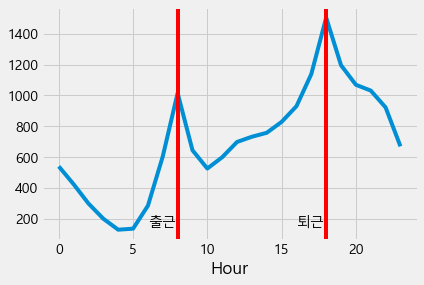

In [11]:
bike.groupby("Hour")["Rented Bike Count"].mean().plot()

plt.axvline(x=8, color="r")
plt.axvline(x=18, color="r")
plt.text(6, 150, "출근")
plt.text(16, 150, "퇴근")

#### 4)  2016년 1월 1일은 금요일이었다. Date변수에서 요일을 뽑아서 파생변수(weekdays) 만들기

In [12]:
bike.loc[:,'Date'] = pd.to_datetime(bike['Date'], format= '%d/%m/%Y')
new = (bike['Date'] - pd.to_datetime('2016-01-01')).astype(str)

new = new.str.split(" ", expand=True)[0].astype(int)

def weekdays(x):
    if x%7 == 0 :
        return '금요일'
    elif x%7 == 1:
        return '토요일'
    elif x%7 == 2:
        return '일요일'
    elif x%7 == 3:
        return '월요일'
    elif x%7 == 4:
        return '화요일'
    elif x%7 == 5:
        return '수요일'
    elif x%7 == 6:
        return '목요일'

bike['weekdays'] = new.apply(weekdays)

bike.sample(10)

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,weekdays
2909,2018-04-01,96,5,12.3,65,0.5,1085,5.8,0.00,0.0,0.0,Spring,No Holiday,Yes,일요일
2798,2018-03-27,618,14,19.4,45,2.0,624,7.1,2.05,0.0,0.0,Spring,No Holiday,Yes,화요일
7825,2018-10-23,547,1,11.1,62,0.2,666,4.0,0.00,0.0,0.0,Autumn,No Holiday,Yes,화요일
5457,2018-07-16,1014,9,28.0,64,1.0,1682,20.5,1.35,0.0,0.0,Summer,No Holiday,Yes,월요일
3060,2018-04-07,697,12,6.0,23,4.2,1990,-13.6,2.00,0.0,0.0,Spring,No Holiday,Yes,툐요일
7845,2018-10-23,1380,21,12.6,70,1.2,1425,7.2,0.00,0.0,0.0,Autumn,No Holiday,Yes,화요일
7776,2018-10-21,848,0,11.2,62,0.0,1613,4.1,0.00,0.0,0.0,Autumn,No Holiday,Yes,일요일
772,2018-01-02,31,4,-2.7,67,0.5,1302,-7.9,0.00,0.0,0.0,Winter,No Holiday,Yes,화요일
8205,2018-11-07,1062,21,13.5,75,0.8,1275,9.1,0.00,0.0,0.0,Autumn,No Holiday,Yes,수요일
209,2017-12-09,481,17,3.5,37,1.8,1963,-9.8,0.10,0.0,0.0,Winter,No Holiday,Yes,툐요일


In [13]:
bike['weekdays'] = ((pd.to_datetime(bike['Date']) - pd.to_datetime('2016-01-01')).dt.days)%7

bike['weekdays'] = bike['weekdays'].map({0 : 'FRI',
                                         1 : 'SAT',
                                         2 : 'SUN',
                                         3 : 'MON',
                                         4 : 'TUE',
                                         5 : 'WED',
                                         6 : 'THU'})

#### 5) 요일별로 평균 몇 대가 대여되었을까?

In [14]:
bike.groupby("weekdays")["Rented Bike Count"].mean()

weekdays
FRI    747.117925
MON    730.563301
SAT    709.528846
SUN    625.155449
THU    690.704327
TUE    687.977564
WED    740.349359
Name: Rented Bike Count, dtype: float64

#### 6) 위의 결과를 막대 그래프로 시각화

<AxesSubplot:xlabel='weekdays', ylabel='Rented Bike Count'>

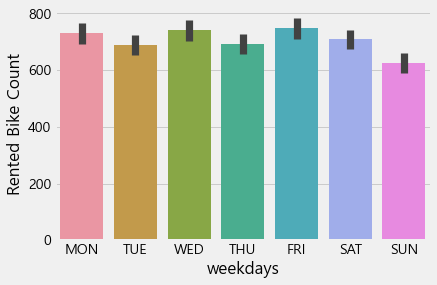

In [16]:
sns.barplot(x="weekdays", y="Rented Bike Count", data=bike,
           order=["MON", "TUE", "WED", "THU", "FRI", "SAT", "SUN"])

#### 7) 요일별 시간대별로 시각화

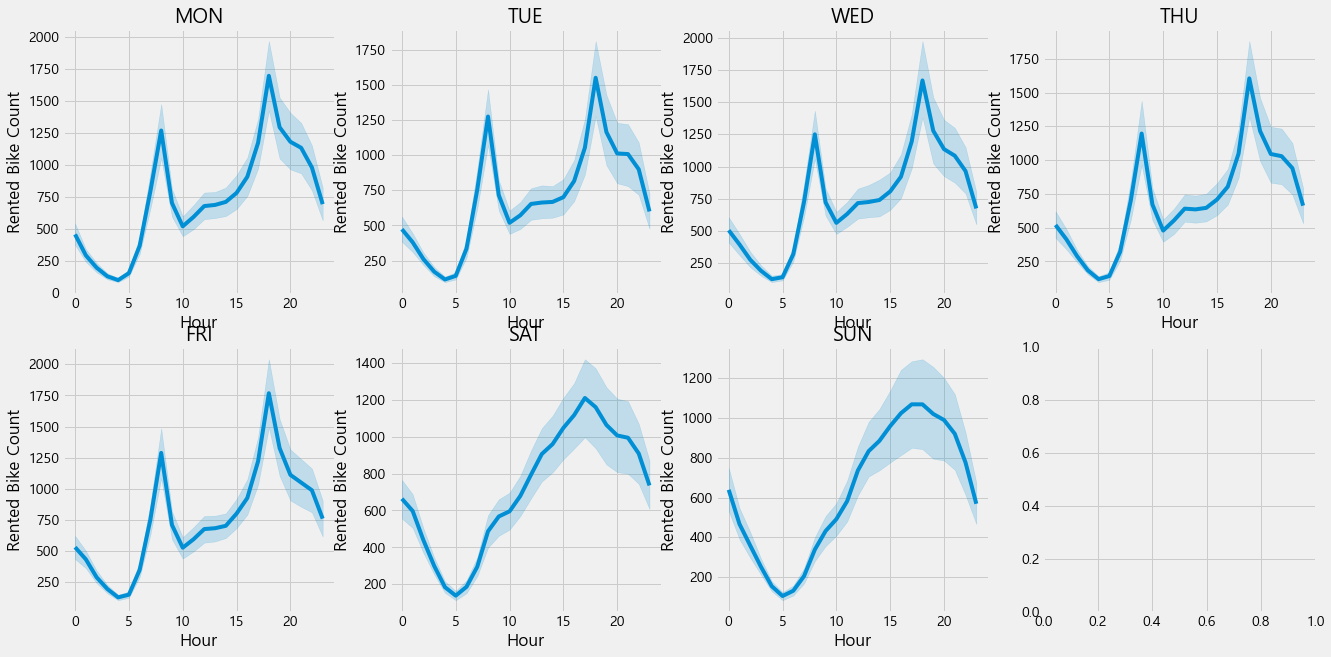

In [24]:
f, ax = plt.subplots(2, 4, figsize=(20, 10))

weekdays_list = ["MON", "TUE", "WED", "THU", "FRI", "SAT", "SUN"]

for i in range(7):
    sns.lineplot("Hour", "Rented Bike Count", 
                 data=bike.loc[bike["weekdays"] == weekdays_list[i]],
                ax=ax[i//4, i%4])
    
    ax[i//4, i%4].set_title(weekdays_list[i])